### Foood Delivery Cost and Profitability Analysis using Python

Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

In [34]:
#importing starting packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [36]:
#importing the dataset
df = pd.read_csv('propriety.csv')

In [38]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [40]:
#viewing data frame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


#### Converting 'Order Date and Time' and 'Delivery Date and Time' to a datetime format.

In [43]:
#importing package
from datetime import datetime

#convert date and time colums to datetime
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

#confirmation
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [45]:
# creating function to extract numeric values from the 'Discounts and Offers' string
import re

def extract_discount(discount_str):
    if pd.isna(discount_str):
        return None

    match = re.search(r'[\d.]+', str(discount_str))
    return float(match.group()) if match else None


In [47]:
# apply the function to create a new 'Discount Value' column
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))

# apply the function to create a new 'Discount Value' column
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))

# for percentage discounts, calculate the discount amount based on the order value
df['Discount Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                    if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)
# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column

df['Discount Amount'] = df.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

print(df[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), df.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  NaN              NaN
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

### Observation
The data is now ready with the following adjustments:

- Order Date and Time and Delivery Date and Time columns have been converted to datetime format.
  
- A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.

  
- Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

### Cost and Profitability Analysis
For the cost analysis, we’ll consider the following costs associated with each order:

- **Delivery Fee**: The fee charged for delivering the order.

- **Payment Processing Fee**: The fee for processing the payment.

- **Discount Amount**: The discount provided on the order.


In [50]:
# calculateing total costs and revenue per order
df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount']
df['Revenue'] = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']

# aggregate data to get overall metrics
total_orders = df.shape[0]
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 221741.84999999998, 'Total Profit': -117943.85}


#### Interpretation
Based on the analysis, here are the overall metrics for the food delivery operations:

- Total Orders: 1,000

- Total Revenue (from Commission Fees): $126,990

- Total Costs: $ 232,709.85 (including delivery fees, payment processing fees, and discounts)
  
- Total Profit: $ - 105,719.85

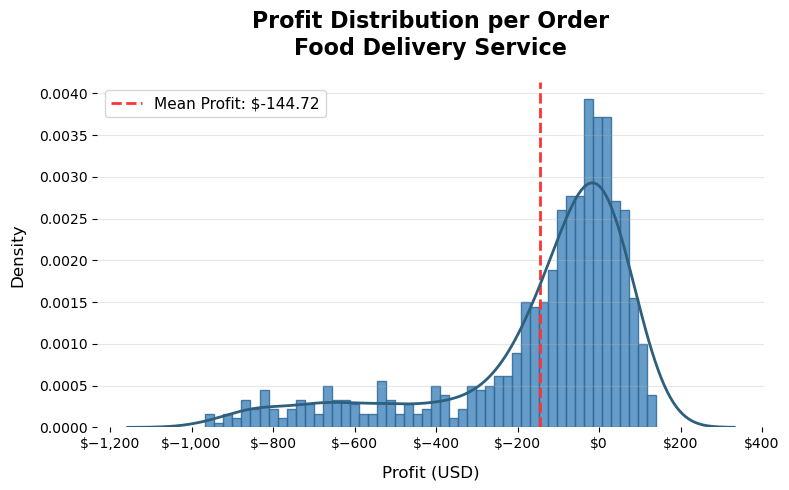

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['Profit'], bins=50, 
         color='#4B8BBE', edgecolor='#306998', 
         alpha=0.85, density=True)


mean_profit = df['Profit'].mean()
plt.axvline(mean_profit, color='#FF3333', linestyle='--', linewidth=2, 
            label=f'Mean Profit: ${mean_profit:,.2f}')


sns.kdeplot(df['Profit'], color='#2E5F7D', linewidth=2)

plt.title('Profit Distribution per Order\nFood Delivery Service', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Profit (USD)', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=11)


plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.tick_params(axis='both', which='major', labelsize=10)


sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

#### Interpretation
The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

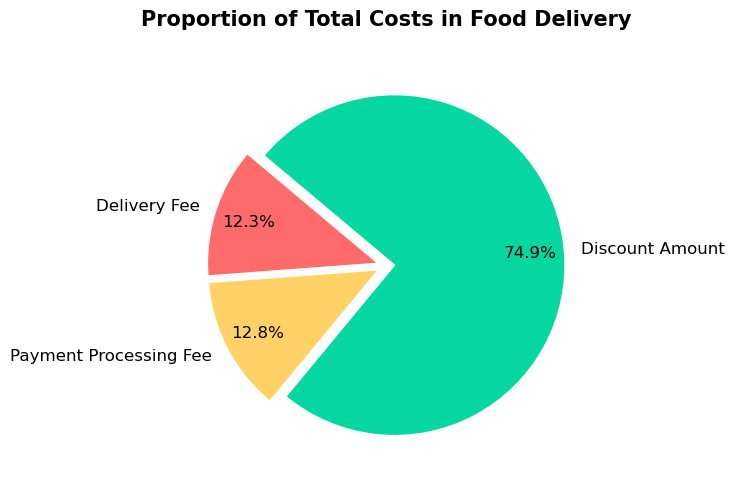

In [55]:
#Pie Chart for cost breakdown
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()

plt.figure(figsize=(8, 5))
explode = (0.05, 0.05, 0.05) 
colors = ['#FF6B6B', '#FFD166', '#06D6A0']  
wedge_props = {'linewidth': 1, 'edgecolor': 'white'}  

plt.pie(costs_breakdown, 
        labels=costs_breakdown.index, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors,
        explode=explode,
        wedgeprops=wedge_props,
        textprops={'fontsize': 12, 'color': 'black', 'fontweight': 'normal'},  
        pctdistance=0.8)

plt.title('Proportion of Total Costs in Food Delivery', 
          fontsize=15, 
          fontweight='bold', 
          pad=20,
          color='black')

plt.gca().set_facecolor('#f8f9fa')


plt.tight_layout()
plt.show()

#### Interpretation
The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

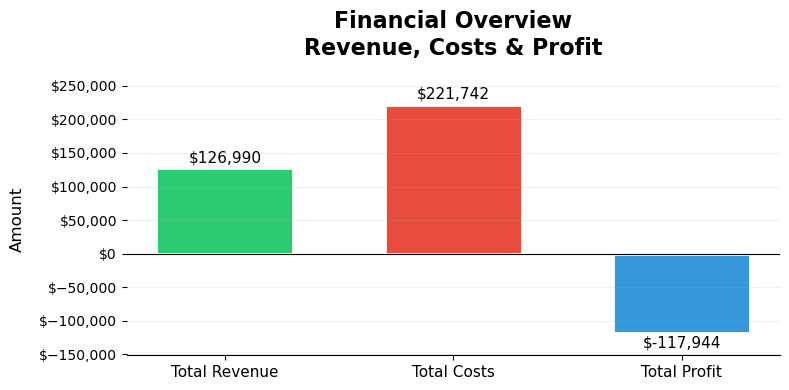

In [58]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

#colors used
colors = ['#2ecc71', '#e74c3c', '#3498db']  # Fresh green, warm red, nice blue

plt.figure(figsize=(8, 4))
bars = plt.bar(totals, values, color=colors, width=0.6, edgecolor='white', linewidth=2)


for bar in bars:
    height = bar.get_height()
    if height >= 0:
        label_position = height + max(abs(np.array(values))) * 0.02
        va = 'bottom'
    else:
        label_position = height - max(abs(np.array(values))) * 0.02
        va = 'top'
    
    plt.text(bar.get_x() + bar.get_width()/2., label_position,
             f'${height:,.0f}',
             ha='center', va=va, fontsize=11)


plt.title('Financial Overview\nRevenue, Costs & Profit', 
          fontsize=16, pad=20, fontweight='bold')
plt.ylabel('Amount', fontsize=12, labelpad=10)
plt.xticks(fontsize=11)


plt.axhline(0, color='black', linewidth=0.8, linestyle='-')


y_margin = max(abs(np.array(values))) * 0.15
plt.ylim(min(values) - y_margin, max(values) + y_margin)


plt.gca().yaxis.set_major_formatter('${x:,.0f}')

sns.despine(left=True)
plt.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()

### Developing new stratgegy for Profits
From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

1. A new average commission percentage based on profitable orders.
2. A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

   
Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

- The average commission percentage for profitable orders.
- The average discount percentage for profitable orders. 

In [77]:
# filter the dataset for profitable orders
profitable_orders = df[df['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(f"New Average commission Percentage: {new_avg_commission_percentage}")
print (f"New Average discount Percentage: {new_avg_discount_percentage}")


New Average commission Percentage: 36.99030453177021
New Average discount Percentage: 9.938775510204081


In [91]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
df['Simulated Commission Fee'] = df['Order Value'] * (recommended_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])

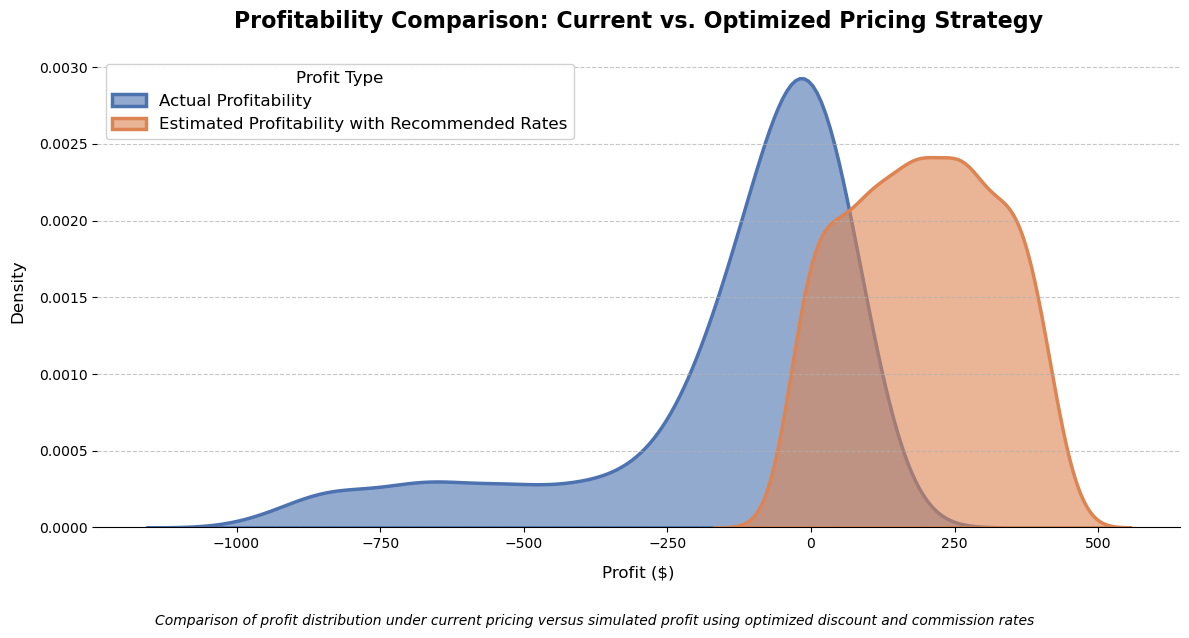

In [107]:
# Visualizing the Profitability Comparison: Actual vs. Simulated
plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8-pastel')  # Using a soft color palette

# Create the KDE plots with enhanced styling
ax = sns.kdeplot(df['Profit'], 
                 label='Actual Profitability', 
                 fill=True, 
                 alpha=0.6, 
                 linewidth=2.5,
                 color='#4C72B0')

ax = sns.kdeplot(df['Simulated Profit'], 
                 label='Estimated Profitability with Recommended Rates', 
                 fill=True, 
                 alpha=0.6, 
                 linewidth=2.5,
                 color='#DD8452')

# Add titles and labels with enhanced formatting
plt.title('Profitability Comparison: Current vs. Optimized Pricing Strategy',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Profit ($)', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)

# Customize the legend
plt.legend(loc='upper left', 
           frameon=True, 
           framealpha=0.9, 
           fontsize=12,
           title='Profit Type',
           title_fontsize=12)

# Add grid lines and adjust spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)

# Add a descriptive caption
plt.figtext(0.5, -0.05, 
            "Comparison of profit distribution under current pricing versus simulated profit using optimized discount and commission rates",
            ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.show()

### Interpretation 
The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%).

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.